<a href="https://colab.research.google.com/github/jkjh23/BusanAIDeveloperCourse_AI_FinalProject/blob/main/Vibration2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
import warnings 

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

from scipy import stats, fftpack

In [3]:
df=pd.read_csv(
    '/content/drive/My Drive/2020_AI_Busan_FinalGroup/Vibration_Normal_1029/LoggedData01.csv', 
    usecols=[0,1,2,3,4,5], names=['X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2'] 
    )
df.head()

,X1,Y1,Z1,X2,Y2,Z2
0,0.020508,-0.019043,1.090332,0.008789,-0.002930,1.327637
1,0.028809,-0.023926,1.093018,0.030273,-0.013428,1.320557
2,0.055420,-0.060059,1.085205,0.019531,0.012207,1.333252
3,0.035889,-0.062012,1.085449,-0.029541,0.002197,1.313477
4,-0.006104,-0.029053,1.086670,0.004395,-0.014893,1.326904


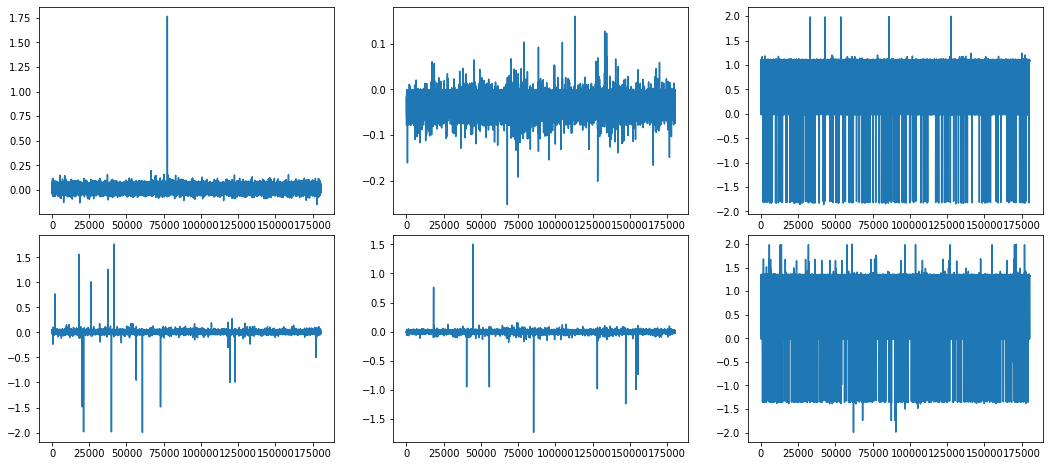

In [3]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(nrows=2, ncols=3, figsize=(18,8))
plt.subplots_adjust(wspace=0.2, hspace=0.1)
ax1.plot(df.X1)
ax2.plot(df.Y1)
ax3.plot(df.Z1)
ax4.plot(df.X2)
ax5.plot(df.Y2)
ax6.plot(df.Z2)
plt.show()

## Abnormal 데이터와 비교

In [4]:
dfNoAb = df.copy()
dfNoAb['label']= 0

tmp = pd.read_csv('/content/drive/My Drive/2020_AI_Busan_FinalGroup/Abnormaldata(10.08)/LoggedData01.csv', names=['X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2'], usecols=[0,1,2,3,4,5])
tmp['label']=3
dfNoAb=pd.concat([dfNoAb, tmp],ignore_index=True)

tmp = pd.read_csv('/content/drive/My Drive/2020_AI_Busan_FinalGroup/Abnormaldata(10.08)/LoggedData02.csv', names=['X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2'], usecols=[0,1,2,3,4,5])
tmp['label']=6
dfNoAb=pd.concat([dfNoAb,tmp],ignore_index=True)

tmp = pd.read_csv('/content/drive/My Drive/2020_AI_Busan_FinalGroup/Abnormaldata(10.08)/LoggedData03.csv', names=['X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2'], usecols=[0,1,2,3,4,5])
tmp['label']=9
dfNoAb=pd.concat([dfNoAb,tmp],ignore_index=True)

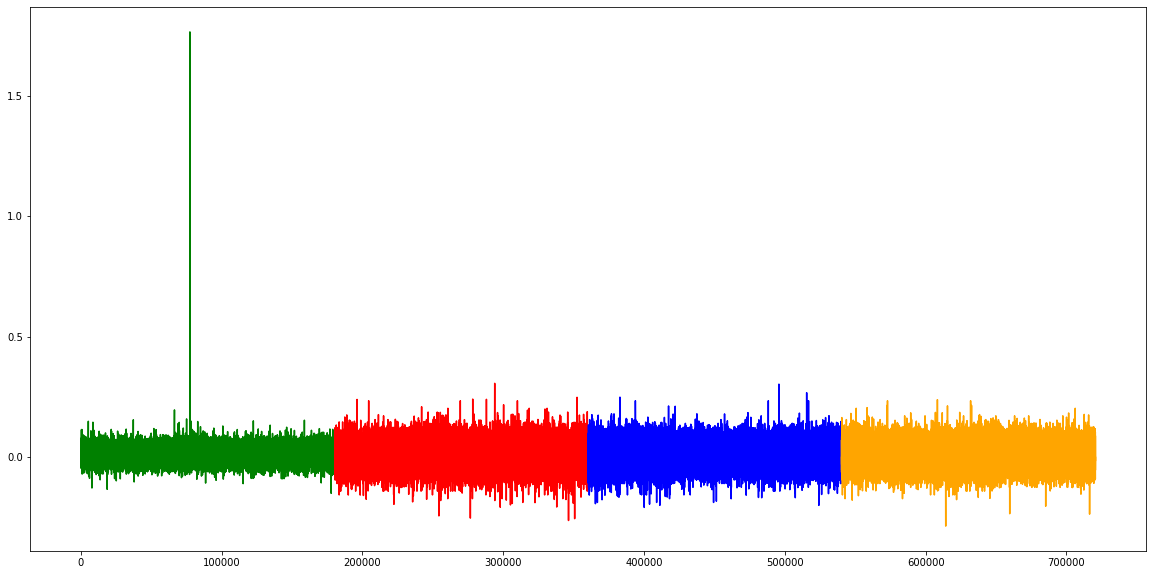

In [5]:
plt.figure(figsize=(20,10))
plt.plot(dfNoAb.X1[dfNoAb.label==0], 'g')
plt.plot(dfNoAb.X1[dfNoAb.label==3], 'r')
plt.plot(dfNoAb.X1[dfNoAb.label==6], 'b')
plt.plot(dfNoAb.X1[dfNoAb.label==9], 'orange')
plt.show()

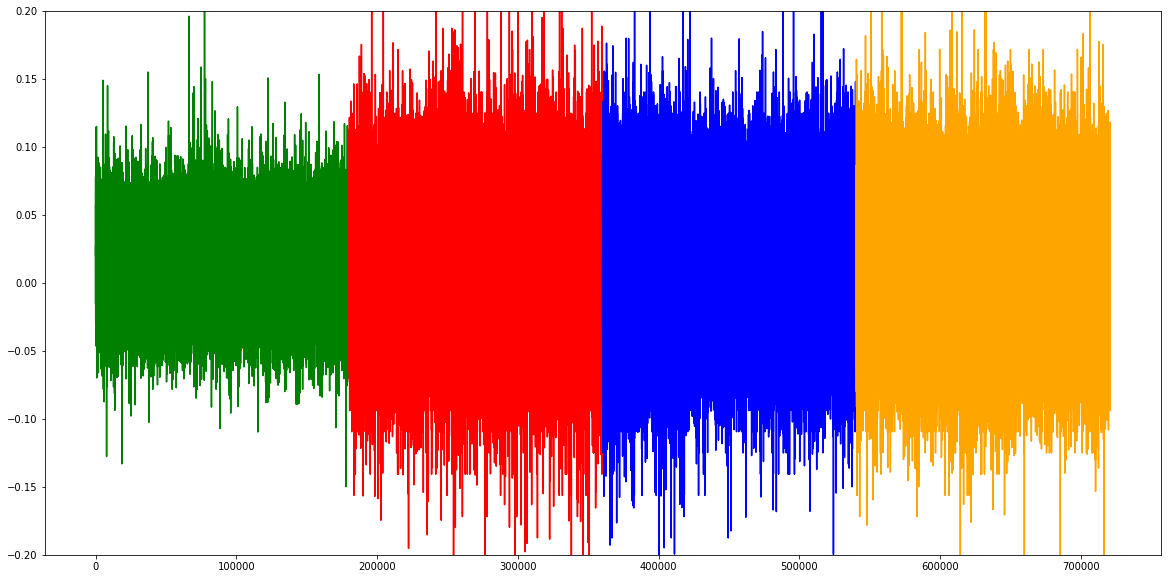

In [35]:
plt.figure(figsize=(20,10))

plt.plot(dfNoAb.X1[dfNoAb.label==0], 'g')
plt.plot(dfNoAb.X1[dfNoAb.label==3], 'r')
plt.plot(dfNoAb.X1[dfNoAb.label==6], 'b')
plt.plot(dfNoAb.X1[dfNoAb.label==9], 'orange')

plt.ylim((-0.2, 0.2))

plt.show()

# 데이터 전처리

## -0.1 < X1 < 0.1 - 나머지값은 0

In [5]:
# ZeroDotOne - 절대값 0.1 넘는 값은 0으로 처리
ScaledZDO = df.copy()
cols = ScaledZDO.columns
for col in cols :
  ScaledZDO[col] = ScaledZDO[col].apply(lambda x : 0 if abs(x) > 0.1 else x)
ScaledZDO

,X1,Y1,Z1,X2,Y2,Z2
0,0.020508,-0.019043,0.0,0.008789,-0.002930,0.0
1,0.028809,-0.023926,0.0,0.030273,-0.013428,0.0
2,0.055420,-0.060059,0.0,0.019531,0.012207,0.0
3,0.035889,-0.062012,0.0,-0.029541,0.002197,0.0
4,-0.006104,-0.029053,0.0,0.004395,-0.014893,0.0
...,...,...,...,...,...,...
180276,0.024658,-0.001221,0.0,0.016113,0.003906,0.0
180277,0.038086,-0.044922,0.0,0.008789,0.009521,0.0
180278,-0.034180,-0.040771,0.0,0.014893,-0.005371,0.0
180279,0.005371,-0.006348,0.0,0.010010,0.001465,0.0


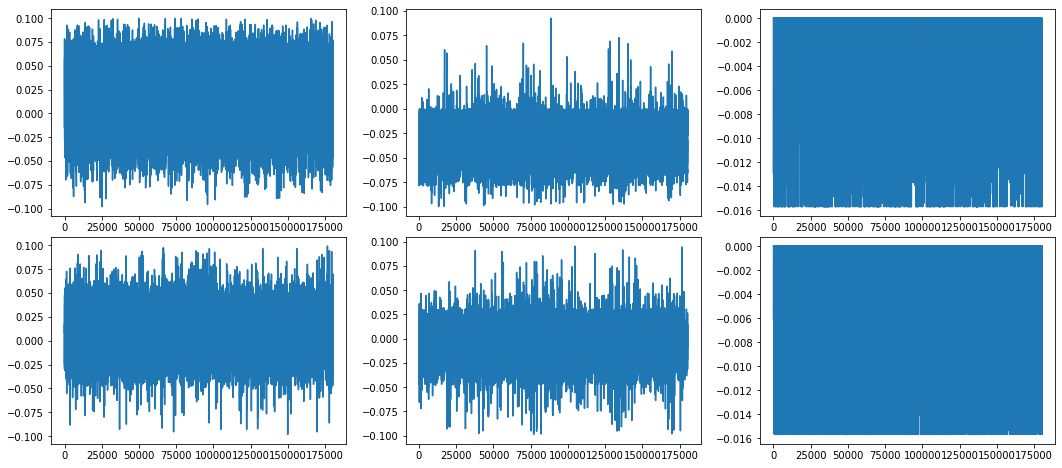

In [6]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(nrows=2, ncols=3, figsize=(18,8))
plt.subplots_adjust(wspace=0.2, hspace=0.1)
ax1.plot(ScaledZDO.X1)
ax2.plot(ScaledZDO.Y1)
ax3.plot(ScaledZDO.Z1)
ax4.plot(ScaledZDO.X2)
ax5.plot(ScaledZDO.Y2)
ax6.plot(ScaledZDO.Z2)
plt.show()

## Scaler

### StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler

tmp = StandardScaler().fit_transform(df)
cols = df.columns

ssdf = pd.DataFrame(index=range(0,len(tmp)), columns=cols)
for idx, col in enumerate(cols) :
  ssdf[col] = tmp.T[idx]
ssdf

,X1,Y1,Z1,X2,Y2,Z2
0,0.323696,1.490993,0.108286,0.047412,0.265561,0.159397
1,0.713052,1.040885,0.125405,1.153801,-0.512974,0.128908
2,1.961236,-2.289800,0.075609,0.600607,1.388127,0.183577
3,1.045138,-2.469824,0.077164,-1.926516,0.645782,0.098418
4,-0.924534,0.568286,0.084946,-0.178871,-0.621619,0.156240
...,...,...,...,...,...,...
180276,0.518351,3.133797,0.098949,0.424586,0.772522,0.141521
180277,1.148188,-0.894494,0.092728,0.047412,1.188932,0.219325
180278,-2.241433,-0.511861,0.131626,0.361758,0.084536,0.120497
180279,-0.386302,2.661198,0.131626,0.110292,0.591496,0.194089


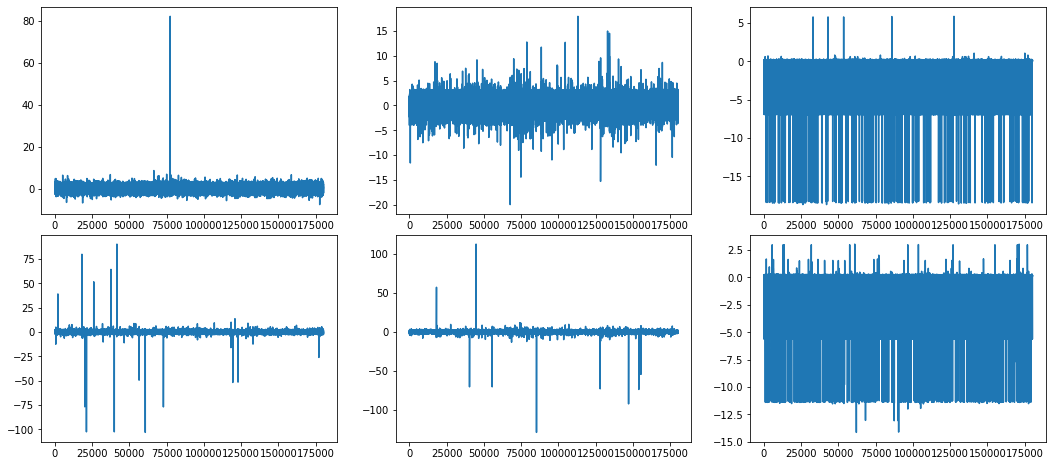

In [8]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(nrows=2, ncols=3, figsize=(18,8))
plt.subplots_adjust(wspace=0.2, hspace=0.1)
ax1.plot(ssdf.X1)
ax2.plot(ssdf.Y1)
ax3.plot(ssdf.Z1)
ax4.plot(ssdf.X2)
ax5.plot(ssdf.Y2)
ax6.plot(ssdf.Z2)
plt.show()

### RobustScaler

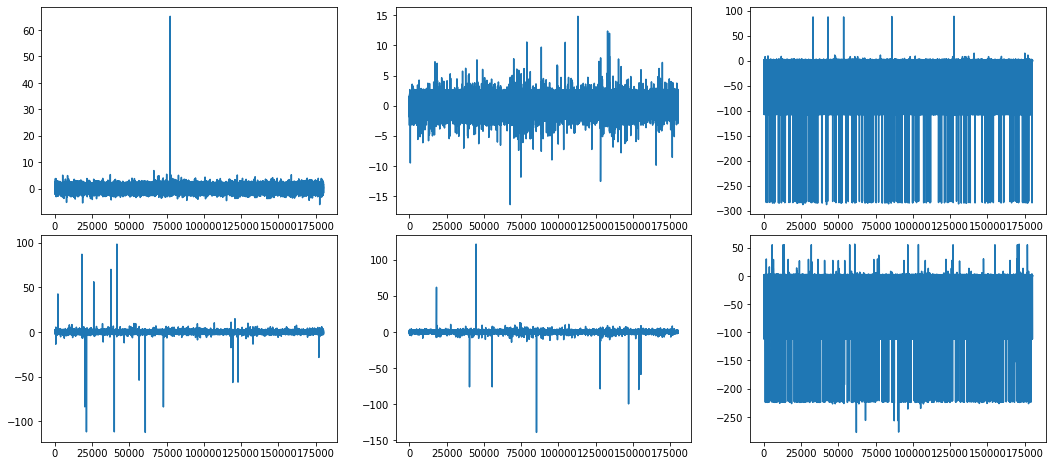

In [29]:
from sklearn.preprocessing import RobustScaler

tmp = RobustScaler().fit_transform(df)
cols = df.columns

ssdf = pd.DataFrame(index=range(0,len(tmp)), columns=cols)
for idx, col in enumerate(cols) :
  ssdf[col] = tmp.T[idx]

fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(nrows=2, ncols=3, figsize=(18,8))
plt.subplots_adjust(wspace=0.2, hspace=0.1)
ax1.plot(ssdf.X1)
ax2.plot(ssdf.Y1)
ax3.plot(ssdf.Z1)
ax4.plot(ssdf.X2)
ax5.plot(ssdf.Y2)
ax6.plot(ssdf.Z2)
plt.show()

## 사분위수 처리

In [28]:
dfIQR = df.describe()
dfIQR.loc['limits'] = dfIQR.loc['75%'] - dfIQR.loc['25%']
dfIQR.loc['low_ideal'] = dfIQR.loc['25%'] - 1.5 * dfIQR.loc['limits']
dfIQR.loc['high_ideal'] = dfIQR.loc['75%'] - 1.5 * dfIQR.loc['limits']
dfIQR

,X1,Y1,Z1,X2,Y2,Z2
count,180281.000000,180281.000000,180281.000000,180281.000000,180281.000000,180281.000000
mean,0.013607,-0.035218,1.073342,0.007868,-0.006511,1.290623
std,0.021320,0.010849,0.156899,0.019418,0.013484,0.232213
min,-0.149902,-0.251953,-1.859436,-1.995605,-1.738281,-1.994873
25%,0.000244,-0.041992,1.085449,-0.000977,-0.012939,1.319336
50%,0.013428,-0.035645,1.090576,0.007812,-0.006836,1.325439
75%,0.027100,-0.028809,1.095703,0.016846,-0.000488,1.331299
max,1.764404,0.159668,1.996826,1.761475,1.506104,1.998291
limits,0.026856,0.013183,0.010254,0.017823,0.012451,0.011963
low_ideal,-0.040040,-0.061767,1.070068,-0.027711,-0.031615,1.301392


### ideal 범위 넘는 수 -> 50%

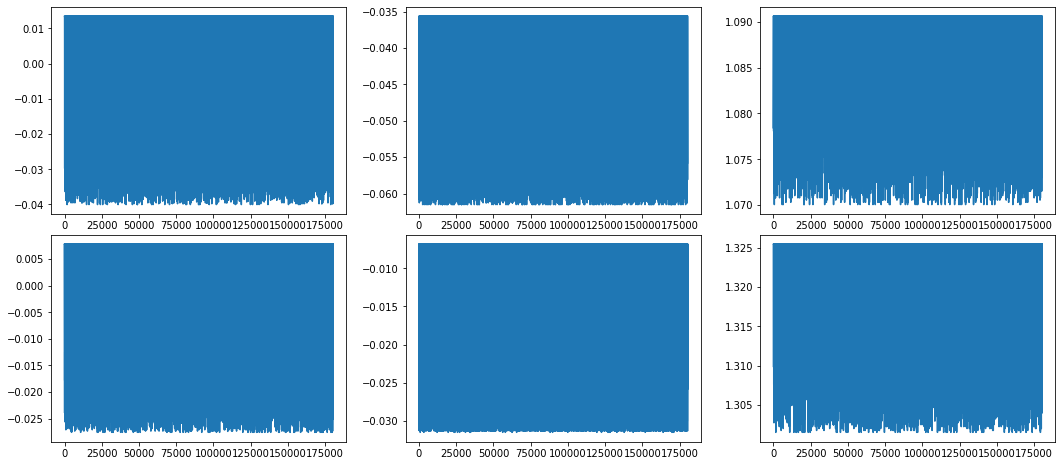

In [65]:
# ideal 범위 벗어나는 수를 50%에 맞추기
ScaledIQR = df.copy()
cols = ScaledIQR.columns
for col in cols :
  quantile50 = dfIQR[col]['50%']
  low_ideal = dfIQR[col]['low_ideal']
  high_ideal = dfIQR[col]['high_ideal']

  ScaledIQR[col] = ScaledIQR[col].apply(lambda x : quantile50 if (x < low_ideal) | (x > high_ideal) else x)

fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(nrows=2, ncols=3, figsize=(18,8))
plt.subplots_adjust(wspace=0.2, hspace=0.1)
ax1.plot(ScaledIQR.X1)
ax2.plot(ScaledIQR.Y1)
ax3.plot(ScaledIQR.Z1)
ax4.plot(ScaledIQR.X2)
ax5.plot(ScaledIQR.Y2)
ax6.plot(ScaledIQR.Z2)
plt.show()

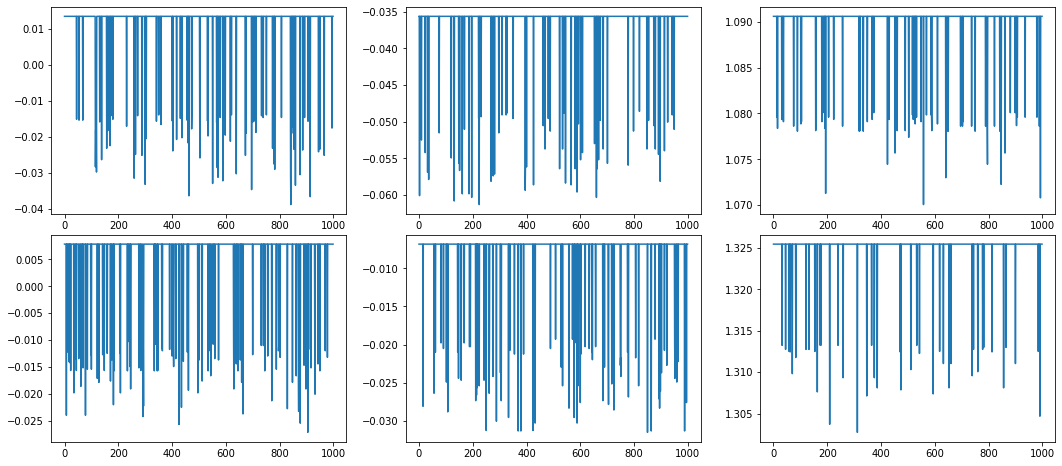

In [68]:
ScaledIQR = df.copy()
cols = ScaledIQR.columns
for col in cols :
  quantile50 = dfIQR[col]['50%']
  low_ideal = dfIQR[col]['low_ideal']
  high_ideal = dfIQR[col]['high_ideal']

  ScaledIQR[col] = ScaledIQR[col].apply(lambda x : quantile50 if (x < low_ideal) | (x > high_ideal) else x)

fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(nrows=2, ncols=3, figsize=(18,8))
plt.subplots_adjust(wspace=0.2, hspace=0.1)
ax1.plot(ScaledIQR.X1[:1000])
ax2.plot(ScaledIQR.Y1[:1000])
ax3.plot(ScaledIQR.Z1[:1000])
ax4.plot(ScaledIQR.X2[:1000])
ax5.plot(ScaledIQR.Y2[:1000])
ax6.plot(ScaledIQR.Z2[:1000])
plt.show()

### 90% 이상 / 10% 이하 -> 50%

In [69]:
ScaledIQR = df.copy()
cols = ScaledIQR.columns
for col in cols :
  quantile50 = dfIQR[col]['50%']
  lowVal = dfIQR[col].quantile(0.1)
  highVal = dfIQR[col].quantile(0.9)

  ScaledIQR[col] = ScaledIQR[col].apply(lambda x : quantile50 if (x < lowVal) | (x > highVal) else x)

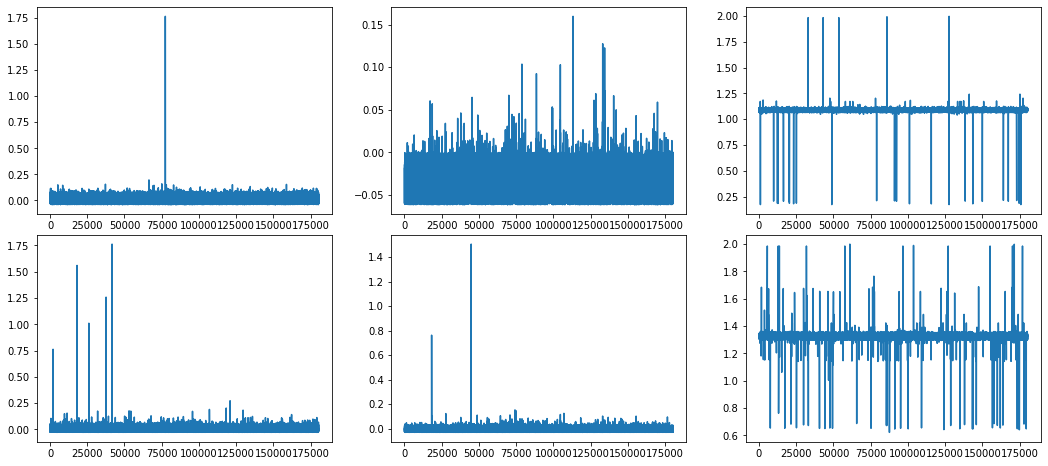

In [70]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(nrows=2, ncols=3, figsize=(18,8))
plt.subplots_adjust(wspace=0.2, hspace=0.1)
ax1.plot(ScaledIQR.X1)
ax2.plot(ScaledIQR.Y1)
ax3.plot(ScaledIQR.Z1)
ax4.plot(ScaledIQR.X2)
ax5.plot(ScaledIQR.Y2)
ax6.plot(ScaledIQR.Z2)
plt.show()

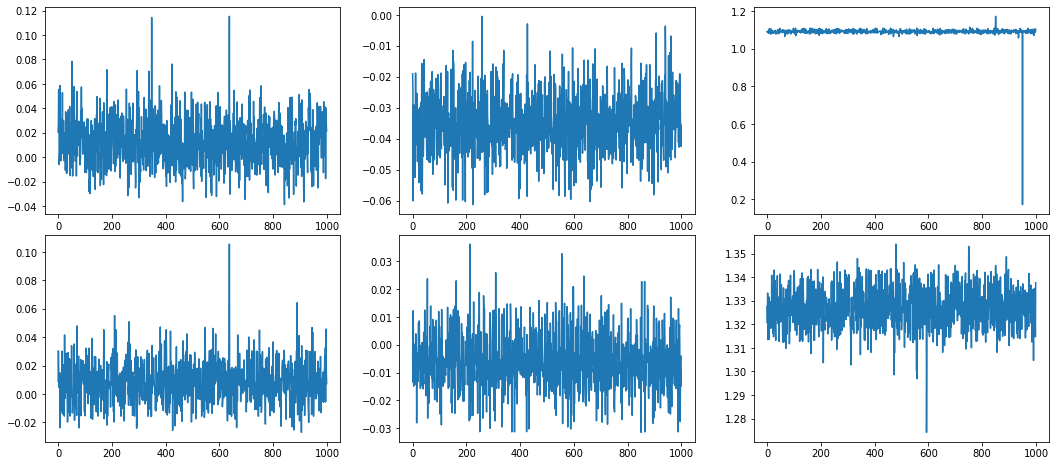

In [71]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(nrows=2, ncols=3, figsize=(18,8))
plt.subplots_adjust(wspace=0.2, hspace=0.1)
ax1.plot(ScaledIQR.X1[:1000])
ax2.plot(ScaledIQR.Y1[:1000])
ax3.plot(ScaledIQR.Z1[:1000])
ax4.plot(ScaledIQR.X2[:1000])
ax5.plot(ScaledIQR.Y2[:1000])
ax6.plot(ScaledIQR.Z2[:1000])
plt.show()

### 80% 이상 / 20% 이하 -> 50%

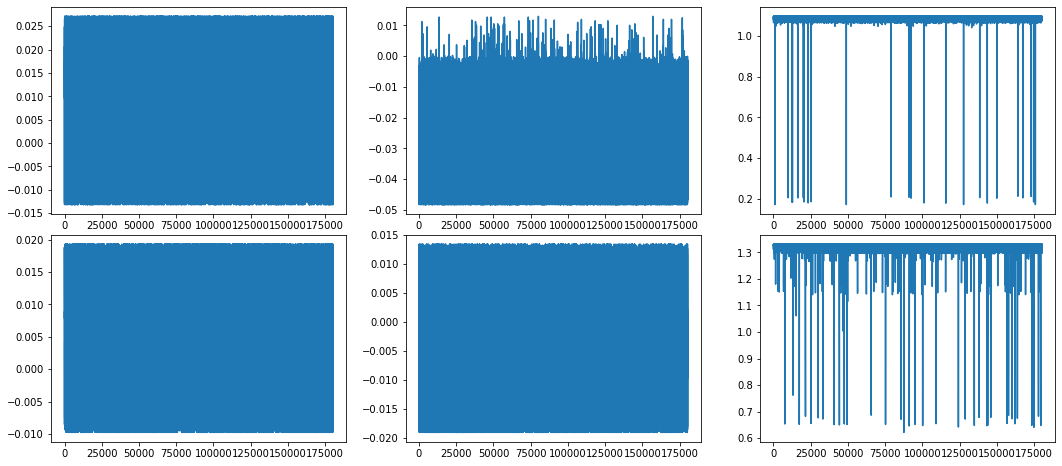

In [73]:
ScaledIQR = df.copy()
cols = ScaledIQR.columns
for col in cols :
  quantile50 = dfIQR[col]['50%']
  lowVal = dfIQR[col].quantile(0.2)
  highVal = dfIQR[col].quantile(0.8)

  ScaledIQR[col] = ScaledIQR[col].apply(lambda x : quantile50 if (x < lowVal) | (x > highVal) else x)

fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(nrows=2, ncols=3, figsize=(18,8))
plt.subplots_adjust(wspace=0.2, hspace=0.1)
ax1.plot(ScaledIQR.X1)
ax2.plot(ScaledIQR.Y1)
ax3.plot(ScaledIQR.Z1)
ax4.plot(ScaledIQR.X2)
ax5.plot(ScaledIQR.Y2)
ax6.plot(ScaledIQR.Z2)
plt.show()

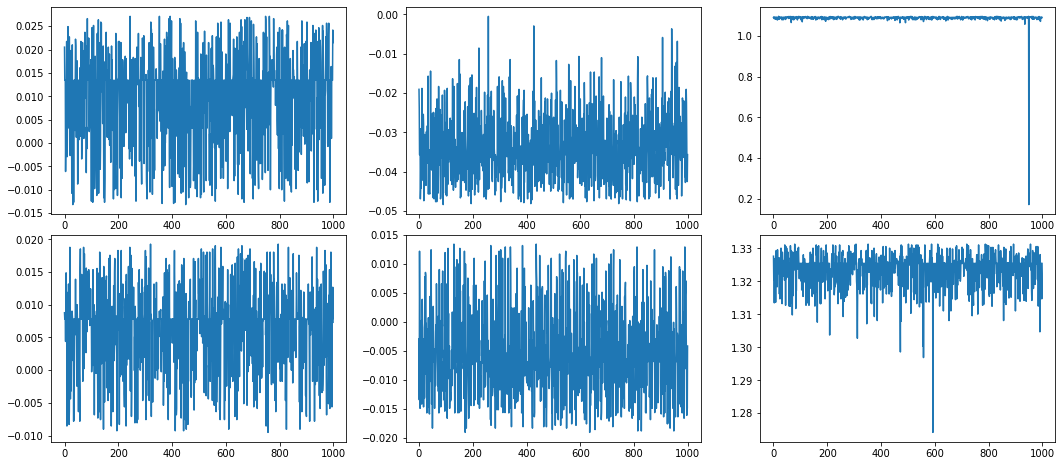

In [77]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(nrows=2, ncols=3, figsize=(18,8))
plt.subplots_adjust(wspace=0.2, hspace=0.1)
ax1.plot(ScaledIQR.X1[:1000])
ax2.plot(ScaledIQR.Y1[:1000])
ax3.plot(ScaledIQR.Z1[:1000])
ax4.plot(ScaledIQR.X2[:1000])
ax5.plot(ScaledIQR.Y2[:1000])
ax6.plot(ScaledIQR.Z2[:1000])
plt.show()

# 축별로 따로따로 처리해야 할 듯

## Max/Min 제거

### 10개씩
- 최대 60개 데이터 삭제 (축 6개 * 10개씩)

In [4]:
MinMaxIdx = list()

dfMinMax = df.copy()
cols = dfMinMax.columns

for col in cols :
  for i in range(0, 10) :
    MinMaxIdx.append(dfMinMax.sort_values(col, ascending=False)[:10].index[i])
    MinMaxIdx.append(dfMinMax.sort_values(col, ascending=True)[:10].index[i])

MinMaxIdx = list(set(MinMaxIdx))
dfMinMax.drop(dfMinMax.index[MinMaxIdx], inplace=True)

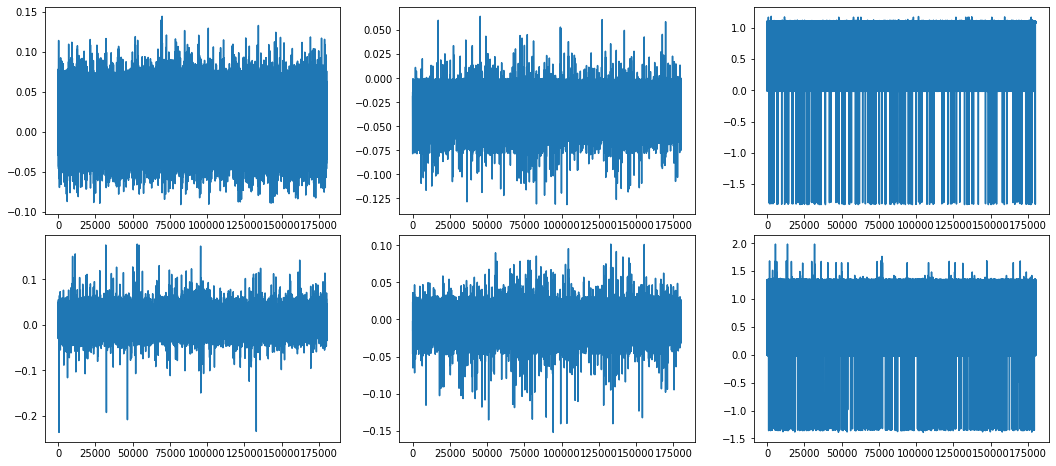

In [5]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(nrows=2, ncols=3, figsize=(18,8))
plt.subplots_adjust(wspace=0.2, hspace=0.1)
ax1.plot(dfMinMax.X1)
ax2.plot(dfMinMax.Y1)
ax3.plot(dfMinMax.Z1)
ax4.plot(dfMinMax.X2)
ax5.plot(dfMinMax.Y2)
ax6.plot(dfMinMax.Z2)
plt.show()

#### X1 FFT

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Frequency Domain (Spectrum) Magnitude')

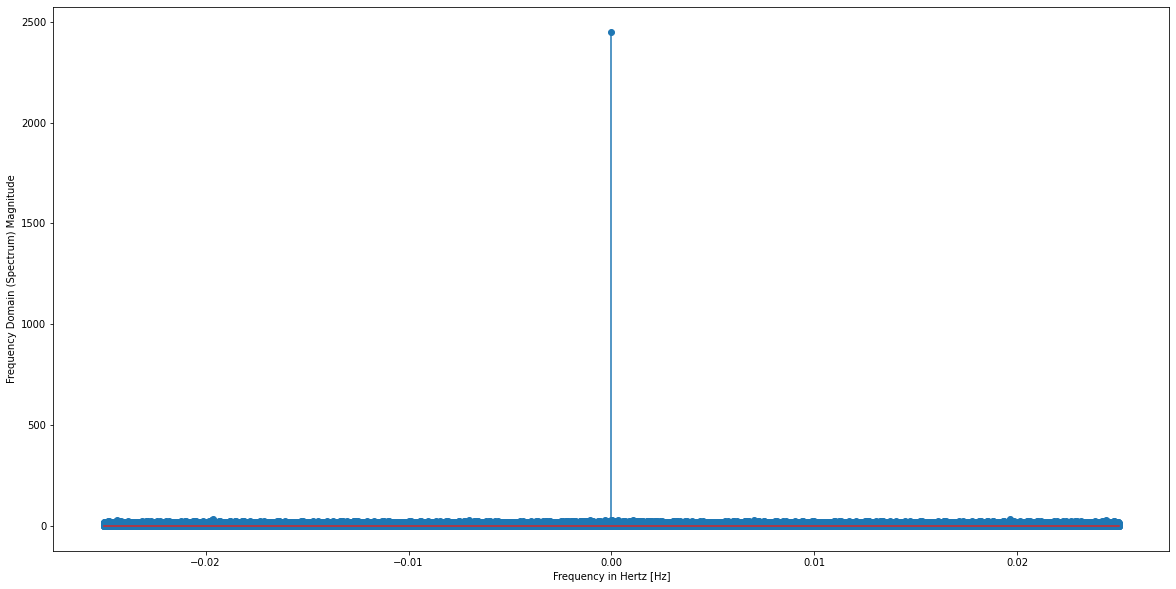

In [67]:
x = dfMinMax['X1'].values
f_s = 0.05

X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots(figsize=(20,10))
ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')

### 5개씩

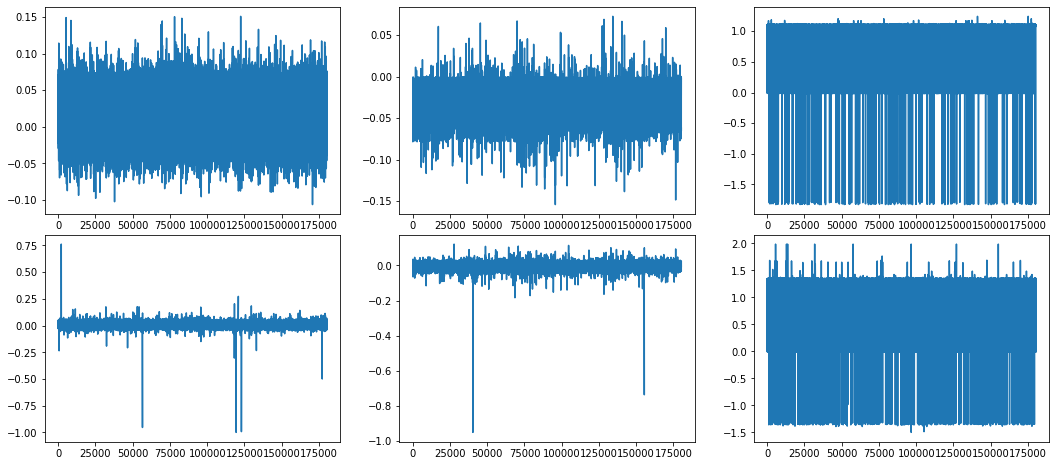

In [64]:
MinMaxIdx = list()

dfMinMax = df.copy()
cols = dfMinMax.columns

for col in cols :
  for i in range(0, 5) :
    MinMaxIdx.append(dfMinMax.sort_values(col, ascending=False)[:5].index[i])
    MinMaxIdx.append(dfMinMax.sort_values(col, ascending=True)[:5].index[i])

MinMaxIdx = list(set(MinMaxIdx))
dfMinMax.drop(dfMinMax.index[MinMaxIdx], inplace=True)

fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(nrows=2, ncols=3, figsize=(18,8))
plt.subplots_adjust(wspace=0.2, hspace=0.1)
ax1.plot(dfMinMax.X1)
ax2.plot(dfMinMax.Y1)
ax3.plot(dfMinMax.Z1)
ax4.plot(dfMinMax.X2)
ax5.plot(dfMinMax.Y2)
ax6.plot(dfMinMax.Z2)
plt.show()

- [FFT 참고 블로그](https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html)

## FFT 변환

### X1

In [36]:
x = df['X1'].values
f_s = 0.05

X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Frequency Domain (Spectrum) Magnitude')

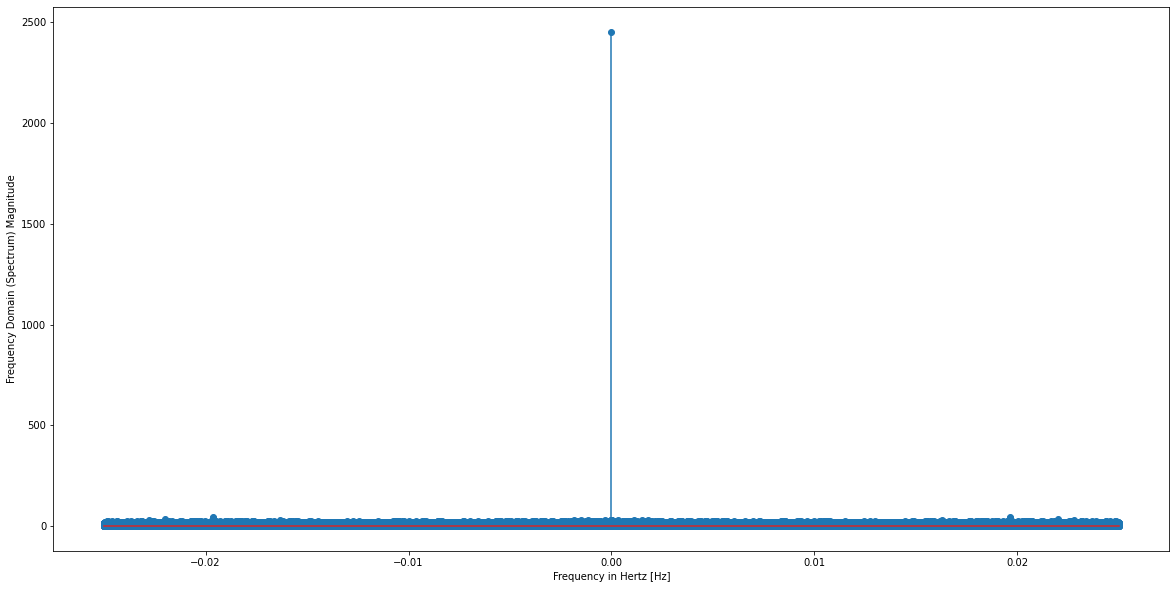

In [37]:
fig, ax = plt.subplots(figsize=(20,10))
ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')

### Normal+Abnormal X1,Y1,Z1

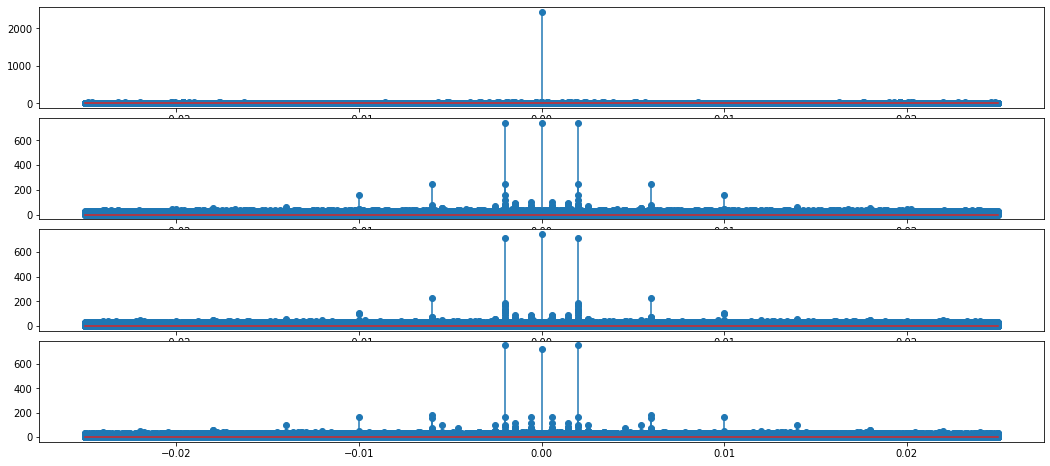

In [4]:
warnings.filterwarnings('ignore')
f_s = 0.05

fig, [ax_x1, ax_x2, ax_x3, ax_x4] = plt.subplots(nrows=4, ncols=1, figsize=(18,8))
plt.subplots_adjust(wspace=0.2, hspace=0.1)
ax_x1.stem(fftpack.fftfreq(len(dfNoAb['X1'][dfNoAb.label==0].values)) * f_s, np.abs(fftpack.fft(dfNoAb['X1'][dfNoAb.label==0].values)))
ax_x2.stem(fftpack.fftfreq(len(dfNoAb['X1'][dfNoAb.label==3].values)) * f_s, np.abs(fftpack.fft(dfNoAb['X1'][dfNoAb.label==3].values)))
ax_x3.stem(fftpack.fftfreq(len(dfNoAb['X1'][dfNoAb.label==6].values)) * f_s, np.abs(fftpack.fft(dfNoAb['X1'][dfNoAb.label==6].values)))
ax_x4.stem(fftpack.fftfreq(len(dfNoAb['X1'][dfNoAb.label==9].values)) * f_s, np.abs(fftpack.fft(dfNoAb['X1'][dfNoAb.label==9].values)))
plt.show()

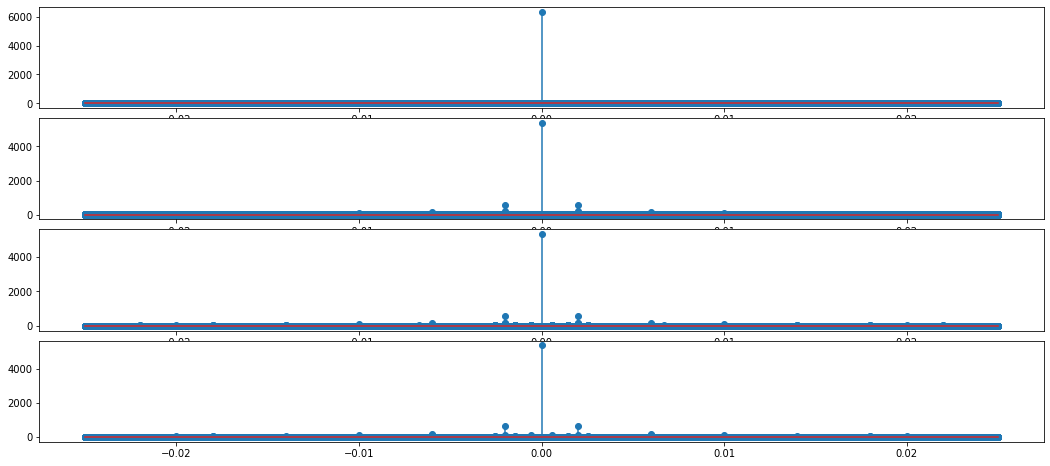

In [9]:
fig, [ax_y1, ax_y2, ax_y3, ax_y4] = plt.subplots(nrows=4, ncols=1, figsize=(18,8))
plt.subplots_adjust(wspace=0.2, hspace=0.1)
ax_y1.stem(fftpack.fftfreq(len(dfNoAb['Y1'][dfNoAb.label==0].values)) * f_s, np.abs(fftpack.fft(dfNoAb['Y1'][dfNoAb.label==0].values)))
ax_y2.stem(fftpack.fftfreq(len(dfNoAb['Y1'][dfNoAb.label==3].values)) * f_s, np.abs(fftpack.fft(dfNoAb['Y1'][dfNoAb.label==3].values)))
ax_y3.stem(fftpack.fftfreq(len(dfNoAb['Y1'][dfNoAb.label==6].values)) * f_s, np.abs(fftpack.fft(dfNoAb['Y1'][dfNoAb.label==6].values)))
ax_y4.stem(fftpack.fftfreq(len(dfNoAb['Y1'][dfNoAb.label==9].values)) * f_s, np.abs(fftpack.fft(dfNoAb['Y1'][dfNoAb.label==9].values)))
plt.show()

In [ ]:
fig, [ax_z1, ax_z2, ax_z3, ax_z4] = plt.subplots(nrows=4, ncols=1, figsize=(18,8))
plt.subplots_adjust(wspace=0.2, hspace=0.1)
ax_z1.stem(fftpack.fftfreq(len(dfNoAb['Z1'][dfNoAb.label==0].values)) * f_s, np.abs(fftpack.fft(dfNoAb['Z1'][dfNoAb.label==0].values)))
ax_z2.stem(fftpack.fftfreq(len(dfNoAb['Z1'][dfNoAb.label==3].values)) * f_s, np.abs(fftpack.fft(dfNoAb['Z1'][dfNoAb.label==3].values)))
ax_z3.stem(fftpack.fftfreq(len(dfNoAb['Z1'][dfNoAb.label==6].values)) * f_s, np.abs(fftpack.fft(dfNoAb['Z1'][dfNoAb.label==6].values)))
ax_z4.stem(fftpack.fftfreq(len(dfNoAb['Z1'][dfNoAb.label==9].values)) * f_s, np.abs(fftpack.fft(dfNoAb['Z1'][dfNoAb.label==9].values)))
plt.show()

## CWT

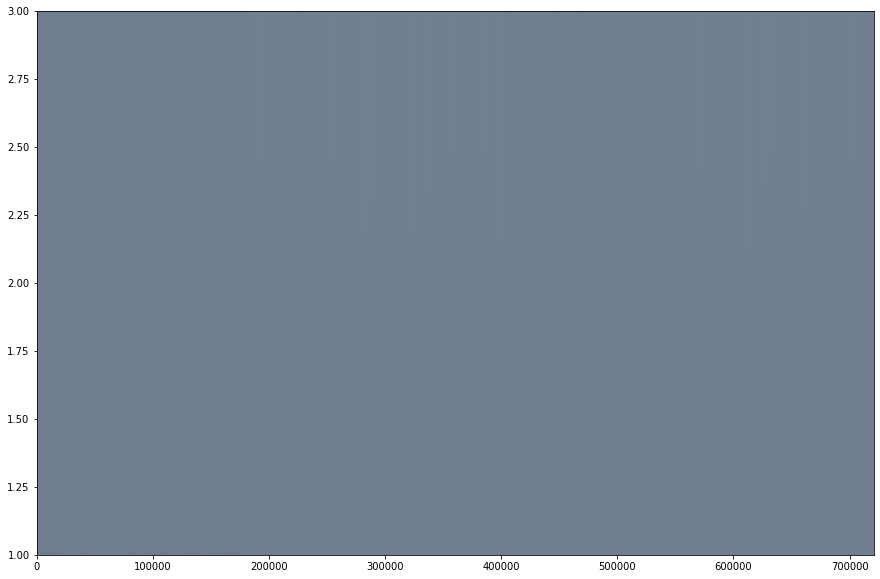

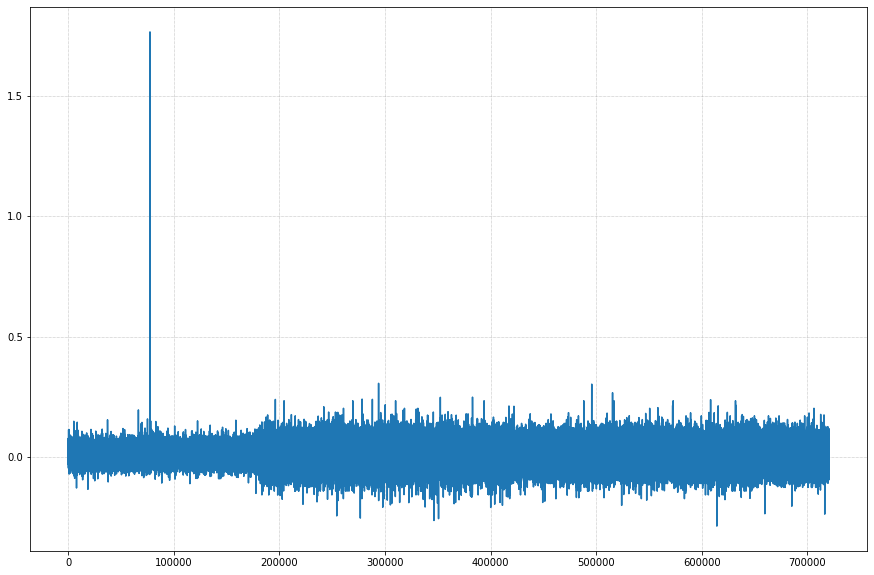

In [12]:
import pywt
t = dfNoAb['X1'].index.values
signal = dfNoAb['X1'].values
scales = np.arange(1,3)
coef, freqs = pywt.cwt(signal, scales, 'gaus1')


plt.figure(figsize=(15,10))
plt.imshow(
    abs(coef), extent=[0,dfNoAb.shape[0],3,1], 
    interpolation='bilinear', cmap='bone', aspect='auto', 
    vmax=abs(coef).max(), vmin=-abs(coef).max()
    )
plt.gca().invert_yaxis()
# plt.yticks(np.arange(1,31,1))
# plt.xticks(np.arange(0,201,10))
plt.show()

plt.figure(figsize=(15,10))
plt.plot(t,signal)
plt.grid(color='gray', linestyle=':', linewidth=0.5)

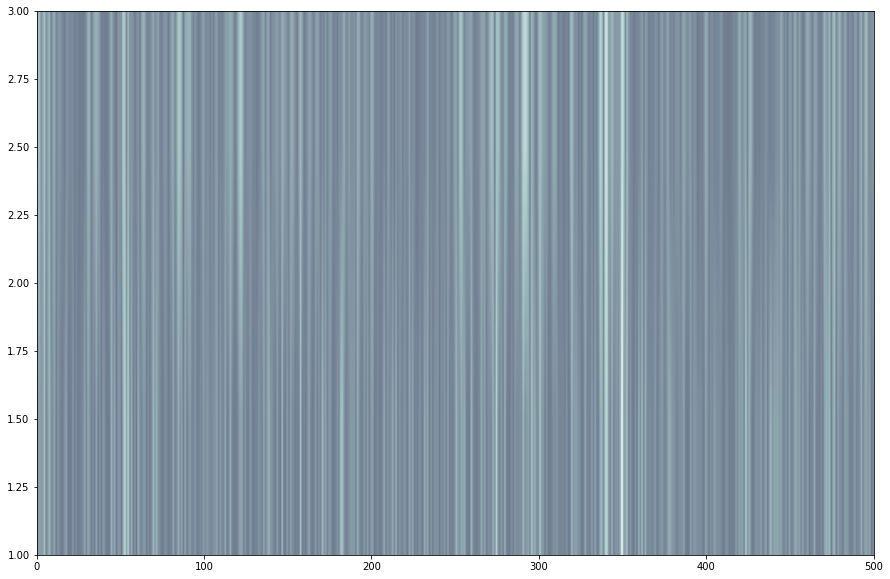

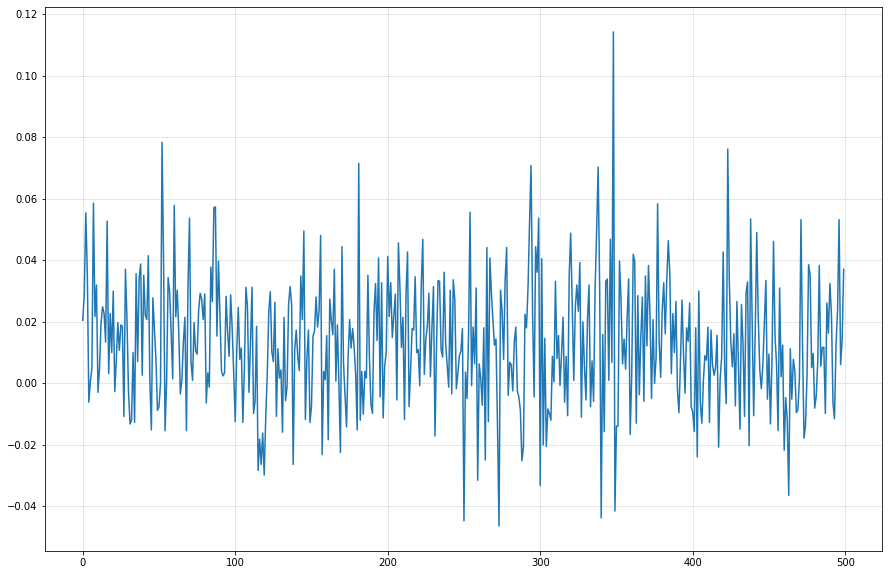

In [13]:
import pywt
t = dfNoAb['X1'][:500].index.values
signal = dfNoAb['X1'][:500].values
scales = np.arange(1,3)
coef, freqs = pywt.cwt(signal, scales, 'gaus1')

plt.figure(figsize=(15,10))
plt.imshow(
    abs(coef), extent=[0,500,3,1], 
    interpolation='bilinear', cmap='bone', aspect='auto', 
    vmax=abs(coef).max(), vmin=-abs(coef).max()
    )
plt.gca().invert_yaxis()
# plt.yticks(np.arange(1,31,1))
# plt.xticks(np.arange(0,201,10))
plt.show()

plt.figure(figsize=(15,10))
plt.plot(t,signal)
plt.grid(color='gray', linestyle=':', linewidth=0.5)

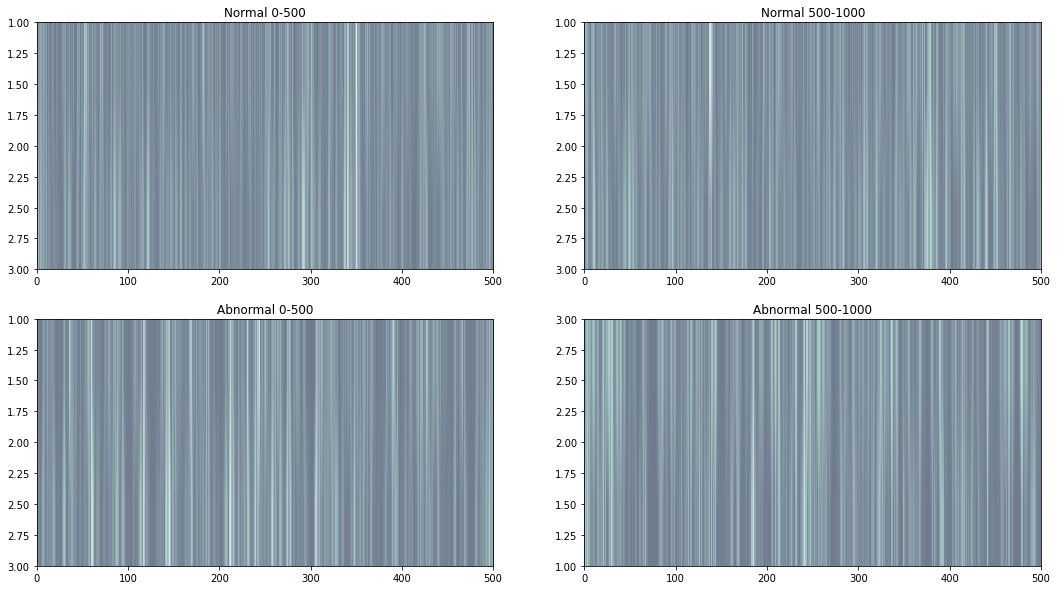

In [15]:
import pywt
t = dfNoAb['X1'][dfNoAb.label==0][:500].index.values
signal = dfNoAb['X1'][dfNoAb.label==0][:500].values
scales = np.arange(1,3)
coef, freqs = pywt.cwt(signal, scales, 'gaus1')


fig, [[ax1, ax2],[ax3,ax4]] = plt.subplots(ncols=2, nrows=2, figsize=(18,10))
ax1.imshow(
    abs(coef), extent=[0,500,3,1], 
    interpolation='bilinear', cmap='bone', aspect='auto', 
    vmax=abs(coef).max(), vmin=-abs(coef).max()
    )
# plt.gca().invert_yaxis()
ax1.set_title('Normal 0-500')

t = dfNoAb['X1'][dfNoAb.label==0][500:1000].index.values
signal = dfNoAb['X1'][dfNoAb.label==0][500:1000].values
scales = np.arange(1,3)
coef, freqs = pywt.cwt(signal, scales, 'gaus1')

ax2.imshow(
    abs(coef), extent=[0,500,3,1], 
    interpolation='bilinear', cmap='bone', aspect='auto', 
    vmax=abs(coef).max(), vmin=-abs(coef).max()
    )
# plt.gca().invert_yaxis()
ax2.set_title('Normal 500-1000')

t = dfNoAb['X1'][dfNoAb.label==3][:500].index.values
signal = dfNoAb['X1'][dfNoAb.label==3][:500].values
scales = np.arange(1,3)
coef, freqs = pywt.cwt(signal, scales, 'gaus1')

ax3.imshow(
    abs(coef), extent=[0,500,3,1], 
    interpolation='bilinear', cmap='bone', aspect='auto', 
    vmax=abs(coef).max(), vmin=-abs(coef).max()
    )
# plt.gca().invert_yaxis()
ax3.set_title('Abnormal 0-500')

t = dfNoAb['X1'][dfNoAb.label==3][500:1000].index.values
signal = dfNoAb['X1'][dfNoAb.label==3][500:1000].values
scales = np.arange(1,3)
coef, freqs = pywt.cwt(signal, scales, 'gaus1')

ax4.imshow(
    abs(coef), extent=[0,500,3,1], 
    interpolation='bilinear', cmap='bone', aspect='auto', 
    vmax=abs(coef).max(), vmin=-abs(coef).max()
    )
ax4.set_title('Abnormal 500-1000')

plt.gca().invert_yaxis()
plt.show()